# 1. Install and Import Dependencies

In [1]:
!pip install torch torchvision torchaidio

ERROR: Could not find a version that satisfies the requirement torchaidio (from versions: none)
ERROR: No matching distribution found for torchaidio


In [2]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

/Users/auliaazmi/opt/anaconda3/envs/venv1/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
!pip install selenium

In [5]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as expected_conditions
import time
import csv

In [6]:
import pandas as pd

In [7]:
import nltk

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [9]:
!pip install wordcloud

# 2. Instantiine Model

## BERT MODEL

In [10]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

## VADER MODEL

# 3. Encode and Calculate Sentiment

## BERT MODEL

In [11]:
tokens = tokenizer.encode('It was a Great Experience! I would definitely fly with Singapore Airlines again!', return_tensors='pt')

In [12]:
tokens

tensor([[  101, 10197, 10140,   143, 11838, 16277,   106,   151, 11008, 69923,
         27393, 19158, 10171, 19649, 17694, 12590,   106,   102]])

In [13]:
tokens[0]

tensor([  101, 10197, 10140,   143, 11838, 16277,   106,   151, 11008, 69923,
        27393, 19158, 10171, 19649, 17694, 12590,   106,   102])

In [14]:
tokenizer.decode(tokens[0])

'[CLS] it was a great experience! i would definitely fly with singapore airlines again! [SEP]'

In [15]:
result = model(tokens)

In [16]:
result

SequenceClassifierOutput(loss=None, logits=tensor([[-2.1834, -2.2341, -0.8046,  1.4386,  2.9149]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [17]:
result.logits

tensor([[-2.1834, -2.2341, -0.8046,  1.4386,  2.9149]],
       grad_fn=<AddmmBackward0>)

In [18]:
int(torch.argmax(result.logits))+1

5

In [19]:
def bert_model(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1


## VADER MODEL

# 4. Collect Reviews

In [ ]:
r = requests.get('https://www.tripadvisor.com/Airline_Review-d8729151-Reviews-Singapore-Airlines')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

In [21]:
url = "https://www.tripadvisor.com/Airline_Review-d8729021-Reviews-ANA-All-Nippon-Airways"

In [22]:
!apt-get update
!apt install chromium-chromedriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
zsh:1: command not found: apt-get
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable thi

/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_2345/2589910448.py:8: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [23]:
driver.get(url)

In [31]:
reviews_list = []
for i in range(0, 1000):
    reviews = driver.find_elements(By.XPATH, "(//q[@class='QewHA H4 _a']/span)") 
    for review in range(len(reviews)):
        reviews_list.append(reviews[review].text)  

    driver.find_element(By.XPATH, "//a[@class='ui_button nav next primary ']").click()
    time.sleep(2)

driver.quit

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//a[@class='ui_button nav next primary ']"}
  (Session info: headless chrome=108.0.5359.124)
Stacktrace:
0   chromedriver                        0x0000000104d9bf38 chromedriver + 4910904
1   chromedriver                        0x0000000104d1ba03 chromedriver + 4385283
2   chromedriver                        0x0000000104960747 chromedriver + 472903
3   chromedriver                        0x00000001049a534c chromedriver + 754508
4   chromedriver                        0x00000001049a55a1 chromedriver + 755105
5   chromedriver                        0x00000001049e8e94 chromedriver + 1031828
6   chromedriver                        0x00000001049cb13d chromedriver + 909629
7   chromedriver                        0x00000001049e628e chromedriver + 1020558
8   chromedriver                        0x00000001049caee3 chromedriver + 909027
9   chromedriver                        0x000000010499530c chromedriver + 688908
10  chromedriver                        0x000000010499688e chromedriver + 694414
11  chromedriver                        0x0000000104d691de chromedriver + 4702686
12  chromedriver                        0x0000000104d6db19 chromedriver + 4721433
13  chromedriver                        0x0000000104d7528e chromedriver + 4752014
14  chromedriver                        0x0000000104d6e91a chromedriver + 4725018
15  chromedriver                        0x0000000104d42b02 chromedriver + 4545282
16  chromedriver                        0x0000000104d8d888 chromedriver + 4851848
17  chromedriver                        0x0000000104d8da05 chromedriver + 4852229
18  chromedriver                        0x0000000104da3e5f chromedriver + 4943455
19  libsystem_pthread.dylib             0x00007ff810af3259 _pthread_start + 125
20  libsystem_pthread.dylib             0x00007ff810aeec7b thread_start + 15


In [33]:
print(len(reviews_list))

3205


# 5. Load Reviews into DataFrame and Score

In [34]:
reviews = pd.DataFrame(list(zip(reviews_list)), columns=['Review'])
reviews.head(5)

,Review
0,Great Service. ANA provided tasty foods and an...
1,"Impossible to get an operator to answer calls,..."
2,Very clean and careful but also very poor leve...
3,ANA's website is primitive and cannot request ...
4,I travelled on ANA from Bangkok to Washington ...


In [35]:
reviews.tail(5)

,Review
3200,ANA is partnered with Air Canada for their fli...
3201,This is my first time flying with ANA. Overall...
3202,"Excellent Airline to fly with, nice staff and ..."
3203,We traveled on ANA with our 1 year old baby. I...
3204,"Nice flight from Manila to Japan, the only dow..."


In [36]:
reviews['bert_score'] = reviews['Review'].apply(lambda x: bert_model(x))
reviews['vader_compound'] = reviews['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [37]:
reviews

,Review,bert_score,vader_compound
0,Great Service. ANA provided tasty foods and an...,5,0.9168
1,"Impossible to get an operator to answer calls,...",1,-0.7579
2,Very clean and careful but also very poor leve...,2,-0.0044
3,ANA's website is primitive and cannot request ...,1,-0.4508
4,I travelled on ANA from Bangkok to Washington ...,4,0.8947
...,...,...,...
3200,ANA is partnered with Air Canada for their fli...,4,0.8578
3201,This is my first time flying with ANA. Overall...,4,0.8126
3202,"Excellent Airline to fly with, nice staff and ...",4,0.9200
3203,We traveled on ANA with our 1 year old baby. I...,4,0.6597


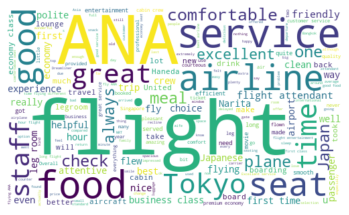

In [38]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

allWords = ' '.join([twts for twts in reviews['Review']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110, background_color="white").generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [39]:
def get_sentiment(compound):
    if compound < 0:
        return 'negative'
    elif compound == 0:
        return 'neutral'
    else:
        return 'positive'

In [40]:
reviews['sentiment'] = reviews['vader_compound'].apply(lambda x: get_sentiment(x))

In [41]:
reviews

,Review,bert_score,vader_compound,sentiment
0,Great Service. ANA provided tasty foods and an...,5,0.9168,positive
1,"Impossible to get an operator to answer calls,...",1,-0.7579,negative
2,Very clean and careful but also very poor leve...,2,-0.0044,negative
3,ANA's website is primitive and cannot request ...,1,-0.4508,negative
4,I travelled on ANA from Bangkok to Washington ...,4,0.8947,positive
...,...,...,...,...
3200,ANA is partnered with Air Canada for their fli...,4,0.8578,positive
3201,This is my first time flying with ANA. Overall...,4,0.8126,positive
3202,"Excellent Airline to fly with, nice staff and ...",4,0.9200,positive
3203,We traveled on ANA with our 1 year old baby. I...,4,0.6597,positive


## bert sentiment

In [42]:
reviews['bert_score'].value_counts()

5    1489
4     928
3     307
2     258
1     223
Name: bert_score, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

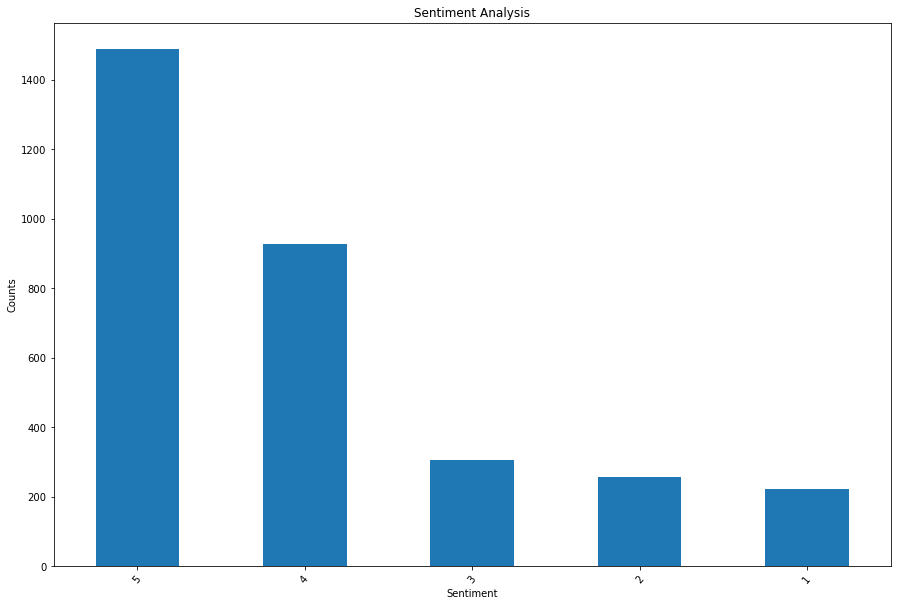

In [43]:
plt.figure(figsize=(15,10))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
reviews['bert_score'].value_counts().plot.bar()
plt.xticks(rotation=50)
plt.show

Text(0.5, 0, 'Airlines Review Sentiment')

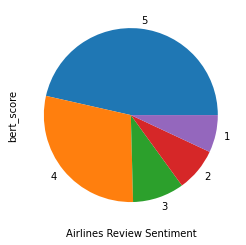

In [44]:
reviews.bert_score.value_counts().plot.pie()
plt.xlabel("Airlines Review Sentiment")

## vader sentiment

In [45]:
reviews['sentiment'].value_counts()

positive    2735
negative     382
neutral       88
Name: sentiment, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

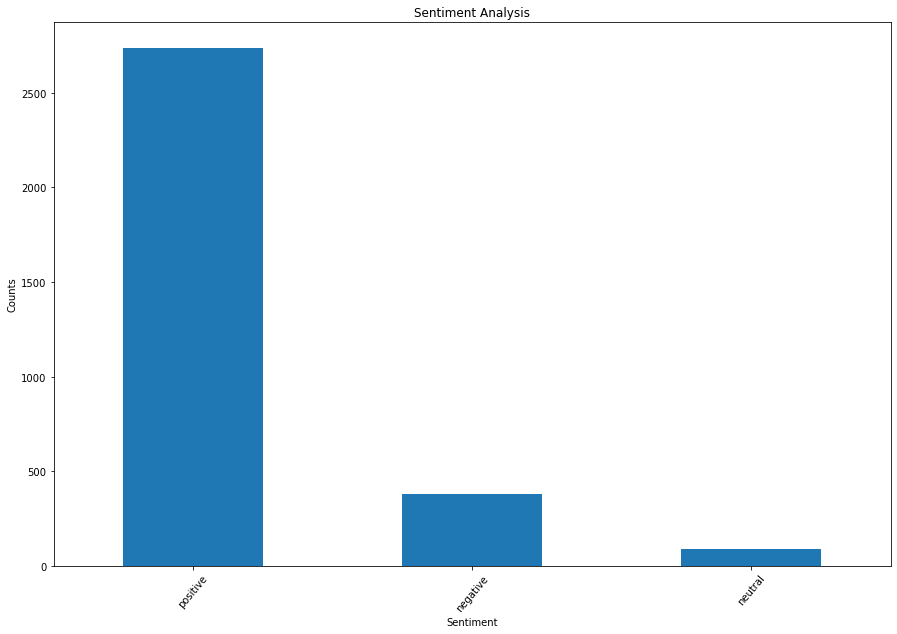

In [46]:
plt.figure(figsize=(15,10))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
reviews['sentiment'].value_counts().plot.bar()
plt.xticks(rotation=50)
plt.show

Text(0.5, 0, 'Airlines Review Sentiment')

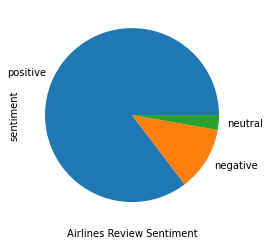

In [47]:
reviews.sentiment.value_counts().plot.pie()
plt.xlabel("Airlines Review Sentiment")

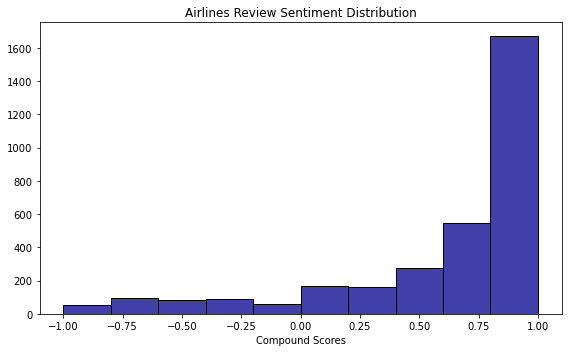

In [48]:
plt.figure(figsize=(8, 5))
sns.histplot(reviews, x='vader_compound', color="darkblue", bins=10, binrange=(-1,1))
plt.title("Airlines Review Sentiment Distribution")
plt.xlabel("Compound Scores")
plt.ylabel("")
plt.tight_layout()

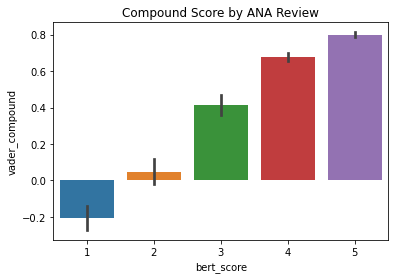

In [51]:
ax = sns.barplot(data=reviews, x='bert_score', y='vader_compound')
ax.set_title('Compound Score by ANA Review')
plt.show()